In [3]:
resized_images_100_100_train_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Train'
resized_images_100_100_test_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test'
resized_images_100_100_validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Validation'

In [4]:
import numpy as np
import keras
from tensorflow.python.keras import models
from tensorflow.python.keras import layers
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import regularizers
from tensorflow.python.keras import optimizers
from tensorflow.python.keras.callbacks import ModelCheckpoint

indusNetModel=models.Sequential()

indusNetModel.add(layers.Conv2D(64, (5, 5), activation='relu', input_shape=(100, 100, 3)))
indusNetModel.add(layers.Conv2D(64, (5, 5), activation='relu'))
indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
indusNetModel.add(layers.Dropout(0.2))

indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(128, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
indusNetModel.add(layers.Dropout(0.2))

indusNetModel.add(layers.Conv2D(256, (3, 3), activation='relu'))
indusNetModel.add(layers.Conv2D(512, (3, 3), activation='relu'))
indusNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))
indusNetModel.add(layers.Dropout(0.2))

indusNetModel.add(layers.Flatten())
indusNetModel.add(layers.Dense(32, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
indusNetModel.add(layers.Dropout(0.2))
indusNetModel.add(layers.Dense(7, activation='softmax'))

indusNetModel.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
indusNetModel.summary()

filepath="IndusNet_7_classes_100_100_4th Experiment.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 96, 96, 64)        4864      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 92, 92, 64)        102464    
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 90, 90, 128)       73856     
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 88, 88, 128)       147584    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 44, 44, 128)       0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 44, 44, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 42, 42, 128)       147584    
__________

In [5]:
batch_size=16

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation  and test data should not be augmented!
validation_datagen=ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        resized_images_100_100_train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        resized_images_100_100_validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

test_generator = test_datagen.flow_from_directory(
        resized_images_100_100_test_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 2800 images belonging to 7 classes.
Found 280 images belonging to 7 classes.
Found 560 images belonging to 7 classes.


In [6]:
number_of_training_samples=2800
number_of_validation_samples=280
number_of_test_samples=560

In [7]:
import math

history = indusNetModel.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=400,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/400
175/175 [==============================] - 45s 258ms/step - loss: 1.8822 - categorical_accuracy: 0.1989 - val_loss: 1.5785 - val_categorical_accuracy: 0.3107
Epoch 2/400
175/175 [==============================] - 40s 227ms/step - loss: 1.5438 - categorical_accuracy: 0.3496 - val_loss: 1.3311 - val_categorical_accuracy: 0.4536
Epoch 3/400
175/175 [==============================] - 40s 228ms/step - loss: 1.3982 - categorical_accuracy: 0.4089 - val_loss: 1.3223 - val_categorical_accuracy: 0.4607
Epoch 4/400
175/175 [==============================] - 39s 224ms/step - loss: 1.3714 - categorical_accuracy: 0.4211 - val_loss: 1.2782 - val_categorical_accuracy: 0.4786
Epoch 5/400
175/175 [==============================] - 33s 186ms/step - loss: 1.3987 - categorical_accuracy: 0.4125 - val_loss: 1.2855 - val_categorical_accuracy: 0.4464
Epoch 6/400
175/175 [==============================] - 33s 191ms/step - loss: 1.3278 - categorical_acc

175/175 [==============================] - 33s 191ms/step - loss: 0.8637 - categorical_accuracy: 0.6864 - val_loss: 0.6909 - val_categorical_accuracy: 0.6929
Epoch 31/400
175/175 [==============================] - 33s 187ms/step - loss: 0.8514 - categorical_accuracy: 0.6786 - val_loss: 0.7387 - val_categorical_accuracy: 0.6857
Epoch 32/400
175/175 [==============================] - 33s 190ms/step - loss: 0.8224 - categorical_accuracy: 0.6871 - val_loss: 0.6889 - val_categorical_accuracy: 0.7393
Epoch 33/400
175/175 [==============================] - 33s 187ms/step - loss: 0.8144 - categorical_accuracy: 0.6946 - val_loss: 0.7051 - val_categorical_accuracy: 0.7143
Epoch 34/400
175/175 [==============================] - 33s 187ms/step - loss: 0.8049 - categorical_accuracy: 0.6989 - val_loss: 0.7183 - val_categorical_accuracy: 0.7107
Epoch 35/400
175/175 [==============================] - 33s 191ms/step - loss: 0.7937 - categorical_accuracy: 0.7032 - val_loss: 0.6783 - val_categorical_accu

Epoch 60/400
175/175 [==============================] - 33s 190ms/step - loss: 0.5682 - categorical_accuracy: 0.8029 - val_loss: 0.6266 - val_categorical_accuracy: 0.7821
Epoch 61/400
175/175 [==============================] - 34s 195ms/step - loss: 0.5928 - categorical_accuracy: 0.7986 - val_loss: 0.5142 - val_categorical_accuracy: 0.8036
Epoch 62/400
175/175 [==============================] - 33s 187ms/step - loss: 0.5811 - categorical_accuracy: 0.7986 - val_loss: 0.5609 - val_categorical_accuracy: 0.7893
Epoch 63/400
175/175 [==============================] - 33s 187ms/step - loss: 0.5436 - categorical_accuracy: 0.8161 - val_loss: 0.6658 - val_categorical_accuracy: 0.8036
Epoch 64/400
175/175 [==============================] - 33s 186ms/step - loss: 0.5261 - categorical_accuracy: 0.8268 - val_loss: 0.6231 - val_categorical_accuracy: 0.7857
Epoch 65/400
175/175 [==============================] - 33s 186ms/step - loss: 0.5583 - categorical_accuracy: 0.8021 - val_loss: 0.5630 - val_cat

175/175 [==============================] - 33s 191ms/step - loss: 0.4190 - categorical_accuracy: 0.8700 - val_loss: 0.4837 - val_categorical_accuracy: 0.8536
Epoch 91/400
175/175 [==============================] - 33s 191ms/step - loss: 0.4077 - categorical_accuracy: 0.8582 - val_loss: 0.6108 - val_categorical_accuracy: 0.8107
Epoch 92/400
175/175 [==============================] - 33s 191ms/step - loss: 0.4045 - categorical_accuracy: 0.8664 - val_loss: 0.4824 - val_categorical_accuracy: 0.8464
Epoch 93/400
175/175 [==============================] - 34s 195ms/step - loss: 0.3960 - categorical_accuracy: 0.8721 - val_loss: 0.4476 - val_categorical_accuracy: 0.8393
Epoch 94/400
175/175 [==============================] - 34s 193ms/step - loss: 0.3649 - categorical_accuracy: 0.8757 - val_loss: 0.4341 - val_categorical_accuracy: 0.8536
Epoch 95/400
175/175 [==============================] - 33s 190ms/step - loss: 0.3676 - categorical_accuracy: 0.8818 - val_loss: 0.5903 - val_categorical_accu

175/175 [==============================] - 33s 190ms/step - loss: 0.3107 - categorical_accuracy: 0.9000 - val_loss: 0.4600 - val_categorical_accuracy: 0.8464
Epoch 121/400
175/175 [==============================] - 33s 190ms/step - loss: 0.3000 - categorical_accuracy: 0.9096 - val_loss: 0.4397 - val_categorical_accuracy: 0.8536
Epoch 122/400
175/175 [==============================] - 33s 190ms/step - loss: 0.2845 - categorical_accuracy: 0.9082 - val_loss: 0.4391 - val_categorical_accuracy: 0.8464
Epoch 123/400
175/175 [==============================] - 33s 190ms/step - loss: 0.2868 - categorical_accuracy: 0.9093 - val_loss: 0.5126 - val_categorical_accuracy: 0.8571
Epoch 124/400
175/175 [==============================] - 33s 190ms/step - loss: 0.2700 - categorical_accuracy: 0.9089 - val_loss: 0.4971 - val_categorical_accuracy: 0.8643
Epoch 125/400
175/175 [==============================] - 33s 190ms/step - loss: 0.2873 - categorical_accuracy: 0.9118 - val_loss: 0.4291 - val_categorical

175/175 [==============================] - 33s 190ms/step - loss: 0.2279 - categorical_accuracy: 0.9289 - val_loss: 0.3966 - val_categorical_accuracy: 0.8893
Epoch 151/400
175/175 [==============================] - 33s 190ms/step - loss: 0.2495 - categorical_accuracy: 0.9239 - val_loss: 0.4230 - val_categorical_accuracy: 0.8786
Epoch 152/400
175/175 [==============================] - 33s 190ms/step - loss: 0.2634 - categorical_accuracy: 0.9232 - val_loss: 0.4689 - val_categorical_accuracy: 0.8714
Epoch 153/400
175/175 [==============================] - 33s 190ms/step - loss: 0.2226 - categorical_accuracy: 0.9300 - val_loss: 0.4890 - val_categorical_accuracy: 0.8607
Epoch 154/400
175/175 [==============================] - 33s 190ms/step - loss: 0.2518 - categorical_accuracy: 0.9232 - val_loss: 0.5721 - val_categorical_accuracy: 0.8571
Epoch 155/400
175/175 [==============================] - 33s 190ms/step - loss: 0.2180 - categorical_accuracy: 0.9329 - val_loss: 0.5381 - val_categorical

175/175 [==============================] - 33s 190ms/step - loss: 0.1951 - categorical_accuracy: 0.9464 - val_loss: 0.3895 - val_categorical_accuracy: 0.8821
Epoch 181/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1811 - categorical_accuracy: 0.9479 - val_loss: 0.5896 - val_categorical_accuracy: 0.8750
Epoch 182/400
175/175 [==============================] - 33s 190ms/step - loss: 0.2032 - categorical_accuracy: 0.9400 - val_loss: 0.4000 - val_categorical_accuracy: 0.8964
Epoch 183/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1957 - categorical_accuracy: 0.9396 - val_loss: 0.3807 - val_categorical_accuracy: 0.8929
Epoch 184/400
175/175 [==============================] - 33s 190ms/step - loss: 0.2193 - categorical_accuracy: 0.9329 - val_loss: 0.5293 - val_categorical_accuracy: 0.8679
Epoch 185/400
175/175 [==============================] - 33s 190ms/step - loss: 0.2377 - categorical_accuracy: 0.9325 - val_loss: 0.3857 - val_categorical

175/175 [==============================] - 33s 190ms/step - loss: 0.1516 - categorical_accuracy: 0.9582 - val_loss: 0.5740 - val_categorical_accuracy: 0.8643
Epoch 211/400
175/175 [==============================] - 33s 189ms/step - loss: 0.1747 - categorical_accuracy: 0.9446 - val_loss: 0.5255 - val_categorical_accuracy: 0.8821
Epoch 212/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1470 - categorical_accuracy: 0.9593 - val_loss: 0.5946 - val_categorical_accuracy: 0.8643
Epoch 213/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1525 - categorical_accuracy: 0.9593 - val_loss: 0.6265 - val_categorical_accuracy: 0.8821
Epoch 214/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1639 - categorical_accuracy: 0.9514 - val_loss: 0.5142 - val_categorical_accuracy: 0.8821
Epoch 215/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1861 - categorical_accuracy: 0.9496 - val_loss: 0.6225 - val_categorical

175/175 [==============================] - 33s 191ms/step - loss: 0.1607 - categorical_accuracy: 0.9571 - val_loss: 0.5632 - val_categorical_accuracy: 0.8929
Epoch 241/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1364 - categorical_accuracy: 0.9664 - val_loss: 0.5484 - val_categorical_accuracy: 0.8893
Epoch 242/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1255 - categorical_accuracy: 0.9646 - val_loss: 0.5933 - val_categorical_accuracy: 0.8786
Epoch 243/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1268 - categorical_accuracy: 0.9643 - val_loss: 0.5057 - val_categorical_accuracy: 0.8786
Epoch 244/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1526 - categorical_accuracy: 0.9564 - val_loss: 0.4221 - val_categorical_accuracy: 0.8964
Epoch 245/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1876 - categorical_accuracy: 0.9479 - val_loss: 0.5584 - val_categorical

Epoch 270/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1158 - categorical_accuracy: 0.9704 - val_loss: 0.6291 - val_categorical_accuracy: 0.8857
Epoch 271/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1393 - categorical_accuracy: 0.9614 - val_loss: 0.5457 - val_categorical_accuracy: 0.8786
Epoch 272/400
175/175 [==============================] - 33s 190ms/step - loss: 0.0980 - categorical_accuracy: 0.9725 - val_loss: 0.5019 - val_categorical_accuracy: 0.9036
Epoch 273/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1273 - categorical_accuracy: 0.9643 - val_loss: 0.5076 - val_categorical_accuracy: 0.8964
Epoch 274/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1408 - categorical_accuracy: 0.9629 - val_loss: 0.4405 - val_categorical_accuracy: 0.8893
Epoch 275/400
175/175 [==============================] - 33s 191ms/step - loss: 0.1420 - categorical_accuracy: 0.9632 - val_loss: 0.4670 - v

Epoch 300/400
175/175 [==============================] - 33s 187ms/step - loss: 0.1020 - categorical_accuracy: 0.9779 - val_loss: 0.4515 - val_categorical_accuracy: 0.8893
Epoch 301/400
175/175 [==============================] - 33s 187ms/step - loss: 0.1162 - categorical_accuracy: 0.9711 - val_loss: 0.4750 - val_categorical_accuracy: 0.8857
Epoch 302/400
175/175 [==============================] - 33s 187ms/step - loss: 0.0902 - categorical_accuracy: 0.9761 - val_loss: 0.5528 - val_categorical_accuracy: 0.8929
Epoch 303/400
175/175 [==============================] - 33s 188ms/step - loss: 0.1290 - categorical_accuracy: 0.9618 - val_loss: 0.5912 - val_categorical_accuracy: 0.8929
Epoch 304/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1284 - categorical_accuracy: 0.9632 - val_loss: 0.5951 - val_categorical_accuracy: 0.8857
Epoch 305/400
175/175 [==============================] - 34s 191ms/step - loss: 0.1231 - categorical_accuracy: 0.9657 - val_loss: 0.6102 - v

Epoch 330/400
175/175 [==============================] - 33s 191ms/step - loss: 0.1087 - categorical_accuracy: 0.9732 - val_loss: 0.6050 - val_categorical_accuracy: 0.8857
Epoch 331/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1083 - categorical_accuracy: 0.9732 - val_loss: 0.4992 - val_categorical_accuracy: 0.8929
Epoch 332/400
175/175 [==============================] - 33s 190ms/step - loss: 0.0792 - categorical_accuracy: 0.9793 - val_loss: 0.4806 - val_categorical_accuracy: 0.8857
Epoch 333/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1171 - categorical_accuracy: 0.9671 - val_loss: 0.4911 - val_categorical_accuracy: 0.8857
Epoch 334/400
175/175 [==============================] - 33s 190ms/step - loss: 0.0967 - categorical_accuracy: 0.9757 - val_loss: 0.5653 - val_categorical_accuracy: 0.8857
Epoch 335/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1036 - categorical_accuracy: 0.9721 - val_loss: 0.5442 - v

175/175 [==============================] - 33s 190ms/step - loss: 0.1223 - categorical_accuracy: 0.9657 - val_loss: 0.3941 - val_categorical_accuracy: 0.8964
Epoch 361/400
175/175 [==============================] - 33s 190ms/step - loss: 0.0775 - categorical_accuracy: 0.9807 - val_loss: 0.5581 - val_categorical_accuracy: 0.8821
Epoch 362/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1120 - categorical_accuracy: 0.9696 - val_loss: 0.5707 - val_categorical_accuracy: 0.8893
Epoch 363/400
175/175 [==============================] - 33s 190ms/step - loss: 0.0802 - categorical_accuracy: 0.9750 - val_loss: 0.6509 - val_categorical_accuracy: 0.8929
Epoch 364/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1128 - categorical_accuracy: 0.9721 - val_loss: 0.5748 - val_categorical_accuracy: 0.8857
Epoch 365/400
175/175 [==============================] - 33s 189ms/step - loss: 0.0913 - categorical_accuracy: 0.9771 - val_loss: 0.4592 - val_categorical

175/175 [==============================] - 33s 190ms/step - loss: 0.0644 - categorical_accuracy: 0.9846 - val_loss: 0.5033 - val_categorical_accuracy: 0.8964
Epoch 391/400
175/175 [==============================] - 33s 190ms/step - loss: 0.0885 - categorical_accuracy: 0.9789 - val_loss: 0.4471 - val_categorical_accuracy: 0.8786
Epoch 392/400
175/175 [==============================] - 33s 190ms/step - loss: 0.0815 - categorical_accuracy: 0.9800 - val_loss: 0.5770 - val_categorical_accuracy: 0.8929
Epoch 393/400
175/175 [==============================] - 33s 190ms/step - loss: 0.0792 - categorical_accuracy: 0.9800 - val_loss: 0.4861 - val_categorical_accuracy: 0.8929
Epoch 394/400
175/175 [==============================] - 33s 191ms/step - loss: 0.0946 - categorical_accuracy: 0.9725 - val_loss: 0.5802 - val_categorical_accuracy: 0.8929
Epoch 395/400
175/175 [==============================] - 33s 190ms/step - loss: 0.1014 - categorical_accuracy: 0.9732 - val_loss: 0.5184 - val_categorical

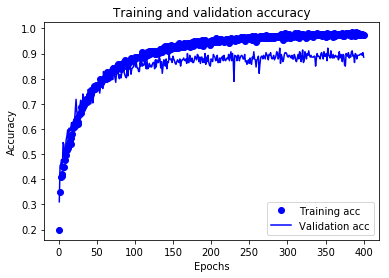

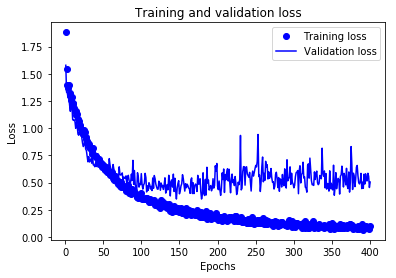

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [9]:
from tensorflow.python.keras.models import load_model

best_model = load_model('IndusNet_7_classes_100_100_4th Experiment.h5')

In [10]:
from tensorflow.python.keras.models import load_model

steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(test_generator, steps=steps_test,verbose=1)
print("Test-set accuracy: {0:.2%}".format(result[1]))

35/35 [==============================] - 3s 77ms/step - loss: 0.4592 - categorical_accuracy: 0.8750
Test-set accuracy: 87.50%


In [11]:
# Preparing test data
import glob
from pathlib import Path
from tensorflow.python.keras.utils import to_categorical
import cv2

apple_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\apple')
banana_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\banana')
orange_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\orange')
watermelon_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\watermelon')
mango_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\mango')
grape_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\grape')
strawberry_cases_dir = Path('D:\\TensorFlow Programs\\fruit_image_classification_Indus Fruit Dataset\\Indus Fruit Dataset_Resized Images_100_100\\Test\\strawberry')

apple_cases = apple_cases_dir.glob('*.jpg')
banana_cases = banana_cases_dir.glob('*.jpg')
orange_cases = orange_cases_dir.glob('*.jpg')
watermelon_cases = watermelon_cases_dir.glob('*.jpg')
mango_cases = mango_cases_dir.glob('*.jpg')
grape_cases = grape_cases_dir.glob('*.jpg')
strawberry_cases = strawberry_cases_dir.glob('*.jpg')

test_data = []
test_labels = []

for img in apple_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [0]
    test_data.append(img)
    test_labels.append(label)

for img in banana_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [1]
    test_data.append(img)
    test_labels.append(label)

for img in grape_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [2]
    test_data.append(img)
    test_labels.append(label)
    
for img in mango_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [3]
    test_data.append(img)
    test_labels.append(label)

for img in orange_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [4]
    test_data.append(img)
    test_labels.append(label)

for img in strawberry_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [5]
    test_data.append(img)
    test_labels.append(label)

for img in watermelon_cases:
    img = cv2.imread(str(img))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = img.astype(np.float32)/255.
    label = [6]
    test_data.append(img)
    test_labels.append(label)

test_data = np.array(test_data)
test_labels = np.array(test_labels)
test_labels_one_hot_encoding=to_categorical(test_labels)

print("Total number of test examples: ", test_data.shape)
print("Total number of labels:", test_labels.shape)

Total number of test examples:  (560, 100, 100, 3)
Total number of labels: (560, 1)


In [12]:
# Evaluation on test dataset

test_loss, test_score = best_model.evaluate(test_data, test_labels_one_hot_encoding, batch_size=8)
print("Loss on test set: ", test_loss)
print("Accuracy on test set: ", test_score)

560/560 [==============================] - 3s 6ms/sample - loss: 0.4592 - categorical_accuracy: 0.8750
Loss on test set:  0.4591952153614589
Accuracy on test set:  0.875


In [13]:
# Get predictions
preds = best_model.predict(test_data, batch_size=16,verbose=1)
preds=np.around(preds)
orig_test_labels=test_labels
predicted_labels=np.argmax(preds,axis=1)
predicted_labels=np.reshape(predicted_labels,(560,1))
print(predicted_labels.shape)
print(orig_test_labels.shape)

560/560 [==============================] - 3s 5ms/sample
(560, 1)
(560, 1)


<Figure size 3600x2400 with 0 Axes>

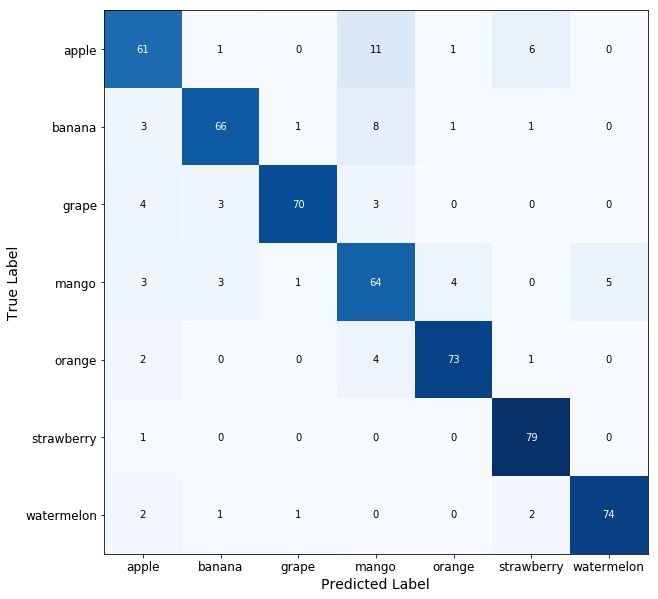

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
# Get the confusion matrix
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

cm  = confusion_matrix(orig_test_labels, predicted_labels)
plt.figure(dpi=600)
plot_confusion_matrix(cm,figsize=(12,10), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(7), ['apple', 'banana','grape','mango','orange','strawberry','watermelon'], fontsize=12)
plt.yticks(range(7), ['apple', 'banana','grape','mango','orange','strawberry','watermelon'], fontsize=12)
plt.xlabel('Predicted Label',fontsize=14)
plt.ylabel('True Label',fontsize=14)
plt.savefig('IndusNet_7 classes_100_100_4th Experiment.jpeg',dpi=1200)
plt.show()